# In this Notebook, We will work on Dataset of 10 Species of Monkeys(Manteled Howler,Patlas,Bald Ukari,Japanese Macaque,Pygmy Marmoset,White Headed Capuchin,Silvery Marmoset,Common Squirrel Monkey,BlackHeaded Night Monkey and Nilgiri Langur). We will predict that the given Monkey belongs to which Species from these 10 Species.


## Import Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

## Import Label text file and print

In [2]:
labels_text_file = 'monkey_labels.txt'
labels = pd.read_csv(labels_text_file)
print(labels)
labels.columns

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

Index(['Label', '  Latin Name           ', ' Common Name                   ',
       ' Train Images ', ' Validation Images'],
      dtype='object')

## Update the Labels name

In [3]:
cols = ['Label', 'Latin Name', 'Common Name', 'Train Images', 'Validation Images']
labels = pd.read_csv(labels_text_file,names=cols,skiprows=1)
print(labels)
labels.columns

   Label                Latin Name                      Common Name  \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

   Train Images  Validation Images  
0           131                 26  
1           139                 28  
2           137                 27  
3           152                 30  
4           131                 2

Index(['Label', 'Latin Name', 'Common Name', 'Train Images',
       'Validation Images'],
      dtype='object')

In [4]:
classes = [x for x in range(0,len(labels))]
print(classes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Make Train and Test Directories and Save the Images after resizing


In [5]:
TRAIN_DIR = './training/'
TEST_DIR = './validation/'
TRAIN_IMG, TRAIN_CLS, TEST_IMG, TEST_CLS = ([] for i in range(4))

In [6]:
for x in range(0, len(labels)):
    train_dir = TRAIN_DIR + labels.loc[x,'Label'].strip() + '/'
    test_dir = TEST_DIR + labels.loc[x,'Label'].strip() + '/'
    for file in os.listdir(train_dir):
        if not file.endswith('jpg'):
            print("empty file")
            continue
        img = cv2.imread(train_dir + file)
        if img is not None:
            img = cv2.resize(img, (100, 100))
            TRAIN_IMG.append(img)
            TRAIN_CLS.append(x)
    for file in os.listdir(test_dir):
        img = cv2.imread(test_dir + file)
        if img is not None:
            img = cv2.resize(img, (100, 100))
            TEST_IMG.append(img)
            TEST_CLS.append(x)
print("COMPLETE")

empty file
COMPLETE


### Print a test Image

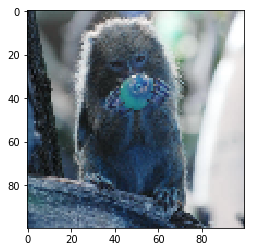

In [7]:
imgplot = plt.imshow(TRAIN_IMG[500])


In [8]:
# convert to numpy arrays
TRAIN_IMG = np.array(TRAIN_IMG).astype('float32')
TEST_IMG = np.array(TEST_IMG).astype('float32')
TRAIN_CLS = np.array(TRAIN_CLS)
TEST_CLS = np.array(TEST_CLS)


### Flatten the Images 

In [9]:
TEST_IMG /= 255
TRAIN_IMG /= 255

## Convert to the Categorical

In [10]:
from keras.utils import np_utils
TRAIN_CLS = np_utils.to_categorical(TRAIN_CLS, 10)
TEST_CLS = np_utils.to_categorical(TEST_CLS, 10)

Using TensorFlow backend.


## Import Neccessary Libraries

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from numpy.random import RandomState

## Create Convolutionary Network

In [26]:

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 10, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

 

## Fit the Classifier

In [27]:
print("TRAINING SIMPLE MODEL FOR {} EPOCHS using {} kernel size".format(10, (3,3))) 
history = classifier.fit(TRAIN_IMG, TRAIN_CLS, batch_size=10, epochs=20, verbose=1, validation_split=0.1, shuffle=True)

TRAINING SIMPLE MODEL FOR 10 EPOCHS using (3, 3) kernel size
Train on 987 samples, validate on 110 samples
Epoch 1/20
987/987 [==============================] - 6s 6ms/step - loss: 0.3030 - acc: 0.8997 - val_loss: 1.0621 - val_acc: 0.8436
Epoch 2/20
987/987 [==============================] - 5s 5ms/step - loss: 0.2036 - acc: 0.9238 - val_loss: 1.3773 - val_acc: 0.8009
Epoch 3/20
987/987 [==============================] - 5s 5ms/step - loss: 0.1564 - acc: 0.9400 - val_loss: 1.6687 - val_acc: 0.8109
Epoch 4/20
987/987 [==============================] - 5s 5ms/step - loss: 0.1239 - acc: 0.9558 - val_loss: 1.6328 - val_acc: 0.8164
Epoch 5/20
987/987 [==============================] - 5s 5ms/step - loss: 0.0841 - acc: 0.9703 - val_loss: 1.7732 - val_acc: 0.8182
Epoch 6/20
987/987 [==============================] - 5s 5ms/step - loss: 0.0559 - acc: 0.9825 - val_loss: 1.7838 - val_acc: 0.8264
Epoch 7/20
987/987 [==============================] - 5s 5ms/step - loss: 0.0360 - acc: 0.9904 - val_

## Plot the Trainig and Validation Accuracy Graph

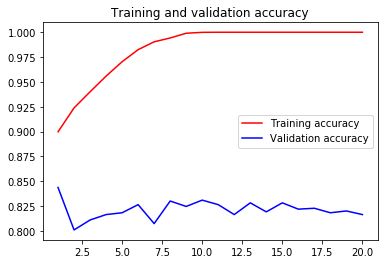

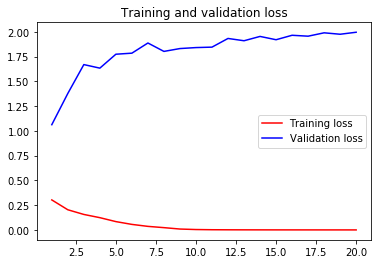

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## Print the Total Accuracy and Loss

In [53]:
print(history.history.keys())
loss, acc = classifier.evaluate(TEST_IMG, TEST_CLS, verbose=1)
print("Loss: ", loss, " Accuracy: ", acc)


dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])
272/272 [==============================] - 1s 3ms/step
Loss:  0.4871028574074016  Accuracy:  0.930514700272504
